# Team Member

- Joey He - joeyhe01@ischool.berkeley.edu
- Nicholas Xu - nicholas@ischool.berkeley.edu
  

## Links
- [Data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
- [Competition](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

## Description of the Data and Features
The dataset used in this project has been sourced from a Kaggle competition titled 'House Prices - Advanced Regression Techniques'. It includes 1460 instances of homes, each characterized by 79 features describing all aspects of residential homes in Ames, Iowa. The dataset is divided into a training set and a test set.

The goal is to predict the 'SalePrice' variable for the test set, using various machine learning and regression techniques.

A brief description of the features used can be found [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

Some of these features include: 'MSSubClass' (The building class), 'MSZoning' (The general zoning classification), 'LotFrontage' (Linear feet of street connected to property), 'LotArea' (Lot size in square feet), and many more.

## Metric Consideration
Our primary metric of evaluation for this regression task is the Root Mean Squared Error (RMSE), offering several advantages for our scenario:

RMSE quantifies prediction errors by computing the square root of the average squared discrepancies between predicted and observed house prices. By squaring the errors, RMSE penalizes larger mistakes more heavily, thereby prioritizing accuracy in our price predictions.

Compared to R-squared, RMSE provides a more direct measure of predictive capacity. While R-squared estimates the proportion of variance explained by the model within the training set, it doesn't necessarily reflect the model's predictive accuracy on unseen data, as highlighted in this article.

Thus, RMSE aligns with our goal of achieving accurate price predictions rather than solely explaining training data variance, offering an interpretable, straightforward measure of the model's prediction error.

---

Note: The notebook would then proceed with the data exploration, preprocessing, model building and evaluation parts.]

In [1]:
!pip install pandas scikit-learn matplotlib seaborn numpy xgboost

# 1. Import libraries and data
I will firstly begin by importing every library that will be used at somepoint throughout this project.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 2. Join data files and preprossessing

In [3]:
# Step 1: Load the dataset and perform data preprocessing
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 3. Initial inspection


In [4]:
# Print basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

From this information, we can already observe that several features have missing values, indicated by the difference between the total number of entries and the non-null count for each feature. Features such as LotFrontage, Alley, FireplaceQu, GarageType, and others have a significant number of missing values. Additionally, the SalePrice feature, which represents the target variable, has only 1460 non-null values, indicating that it is present in the training data but not in the test data.

In [5]:
# Print the first five rows of the dataset
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Print descriptive statistics of the dataset
print(data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [7]:
# Count the number of missing values in each feature
print(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


# 4. Data visual exploration

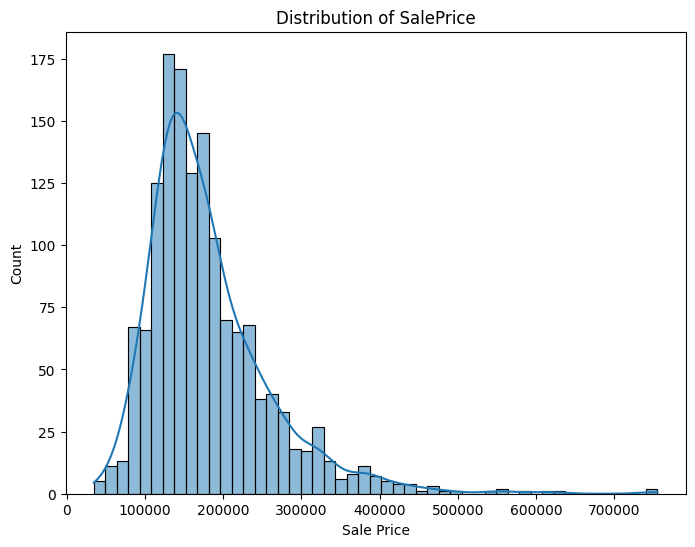

In [8]:
# Plot the distribution of the target variable (SalePrice)
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='SalePrice', kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()


From the plot, we can observe that the SalePrice values are positively skewed, with a peak around $150,000 to $200,000. This distribution provides insights into the range of sale prices and can help identify potential outliers.

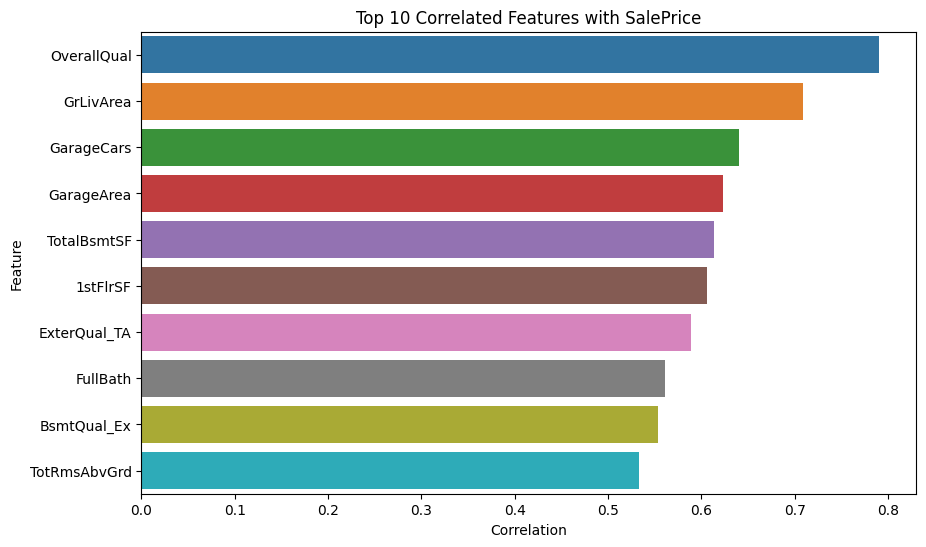

In [9]:
# Select numeric features
numeric_features = data.select_dtypes(include=['int64', 'float64'])

# Encode categorical features using one-hot encoding
categorical_features = data.select_dtypes(include=['object'])
encoded_categorical_features = pd.get_dummies(categorical_features)

# Concatenate numeric and encoded categorical features
processed_data = pd.concat([numeric_features, encoded_categorical_features], axis=1)

# Calculate correlations with the target variable
corr_with_target = processed_data.corr()['SalePrice'].abs().sort_values(ascending=False)
top_correlated_features = corr_with_target[1:11]  # Select the top 10 most correlated features

# Plot the correlation barplot for the top correlated features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_correlated_features.values, y=top_correlated_features.index)
plt.title('Top 10 Correlated Features with SalePrice')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()

We observe high positive correlations between features such as OverallQual, GrLivArea, GarageCars and GarageArea, indicating that larger garage area is associated with a higher car capacity. This visualization helps us understand the interdependencies between different numeric features.

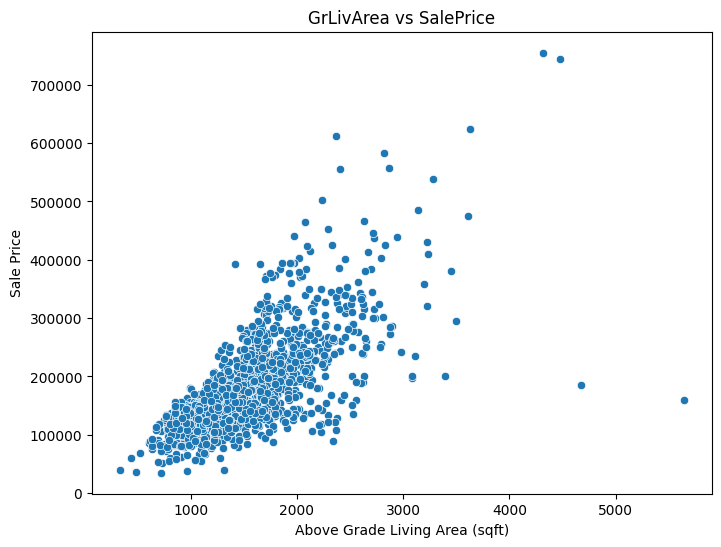

In [10]:

# Plot the scatter plot of a numeric feature against the target variable
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='GrLivArea', y='SalePrice')
plt.title('GrLivArea vs SalePrice')
plt.xlabel('Above Grade Living Area (sqft)')
plt.ylabel('Sale Price')
plt.show()

The scatter plot shows the relationship between the above-grade living area (GrLivArea) and the sale price (SalePrice). From the plot, we can observe a positive linear relationship between the two variables, indicating that as the living area increases, the sale price tends to increase as well. However, there are a few outliers with larger living areas and lower sale prices. These outliers may be worth investigating further to understand if there are any underlying factors contributing to this deviation from the general trend.

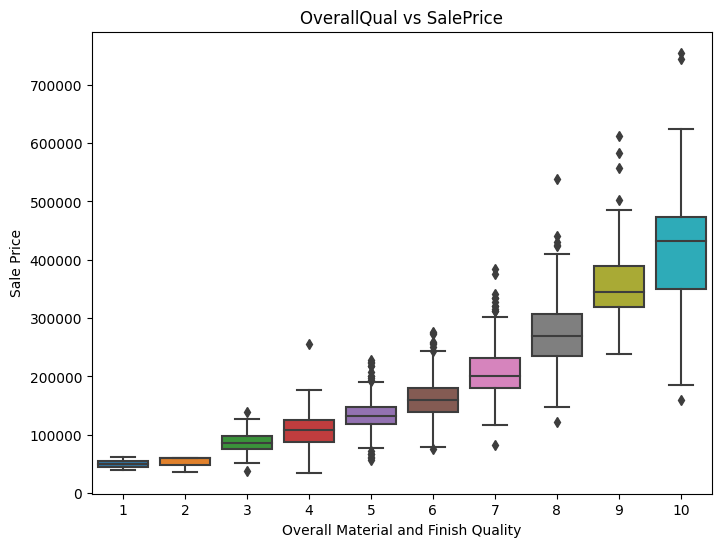

In [11]:

# Plot a boxplot of a categorical feature against the target variable
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='OverallQual', y='SalePrice')
plt.title('OverallQual vs SalePrice')
plt.xlabel('Overall Material and Finish Quality')
plt.ylabel('Sale Price')
plt.show()

The boxplot represents the relationship between the overall material and finish quality (OverallQual) and the sale price (SalePrice). The boxplot allows us to compare the distribution of sale prices across different quality levels. As the overall quality increases, we can observe a general upward trend in the median sale price and the range of prices. This suggests that the overall quality of a property has a positive impact on its sale price. However, there are some overlapping ranges between different quality levels, indicating that other factors may also influence the sale price.

# 5. Feature engineering

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Select useful features
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
                     'ExterQual', 'BsmtQual', 'TotRmsAbvGrd', 'SalePrice']
data = data[selected_features]

# Handle missing values
data['GarageCars'].fillna(0, inplace=True)  # Fill missing values with 0 for GarageCars
data['GarageArea'].fillna(0, inplace=True)  # Fill missing values with 0 for GarageArea
data['TotalBsmtSF'].fillna(0, inplace=True)  # Fill missing values with 0 for TotalBsmtSF
data['BsmtQual'].fillna('NA', inplace=True)  # Fill missing values with 'NA' for BsmtQual

# Fill missing values for other numeric features with their mean on the training set
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())

# Fill missing values for categorical features with their mode on the training set
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    data[feature] = data[feature].fillna(data[feature].mode().iloc[0])

# Encoding categorical variables
data = pd.get_dummies(data, drop_first=True)

# Log transformation for skewed numeric variables
skewed_features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF']
data[skewed_features] = data[skewed_features].apply(lambda x: np.log1p(x))

# Scale numeric variables
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Split the data into train and validation sets
processed_train_data, processed_validation_data = train_test_split(data, test_size=0.2, random_state=42)

# Print the first few rows of the processed train data
print(processed_train_data.head())


      OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
254     -0.795151  -0.260873   -1.026858   -0.837406     0.376342  0.545626   
1066    -0.071836   0.274896    0.311725   -0.435032    -0.057581 -1.020542   
638     -0.795151  -1.763736   -2.365440   -2.212963    -0.060861 -1.032382   
799     -0.795151   0.629247   -1.026858   -1.090059    -0.135141 -0.374575   
380     -0.795151   0.495679   -1.026858   -0.771903     0.160512 -0.233376   

      TotRmsAbvGrd  SalePrice  ExterQual_Fa  ExterQual_Gd  ExterQual_TA  \
254      -0.934130  -0.452321         False         False          True   
1066      0.296763  -0.036784         False          True         False   
638      -1.549576  -1.207843         False         False          True   
799       0.296763  -0.074560         False         False          True   
380      -0.318683  -0.678977         False         False          True   

      BsmtQual_Fa  BsmtQual_Gd  BsmtQual_NA  BsmtQual_TA  
254         Fal

Visualize the post-processing features again

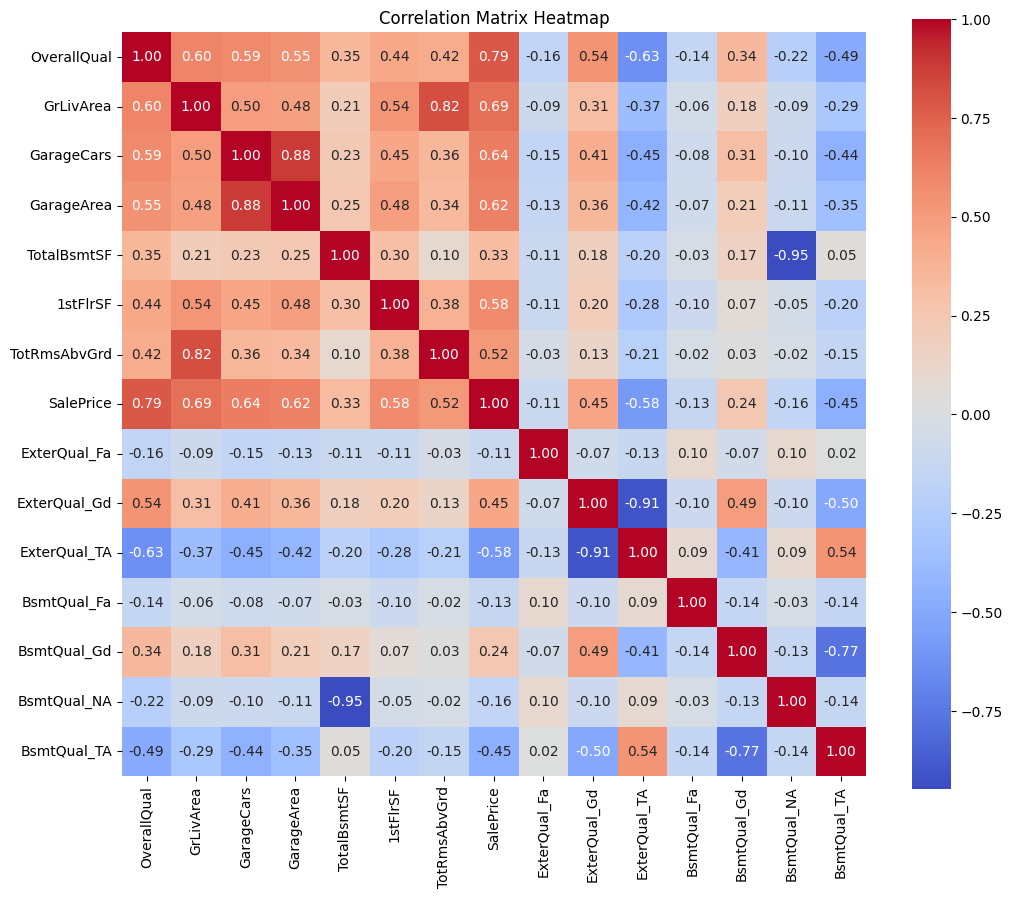

In [13]:

# Create correlation matrix
corr_matrix = processed_train_data.corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


OverallQual (Overall Quality) has positive correlations with several features such as GrLivArea (Above grade (ground) living area), GarageCars, and GarageArea. This suggests that higher overall quality tends to be associated with larger living areas and more spacious garages.
GrLivArea (Above grade (ground) living area) shows a strong positive correlation with TotRmsAbvGrd (Total rooms above grade). This implies that larger living areas tend to have more rooms.
GarageCars and GarageArea have a high positive correlation, indicating that as the number of cars that can be accommodated in the garage increases, so does the garage area.

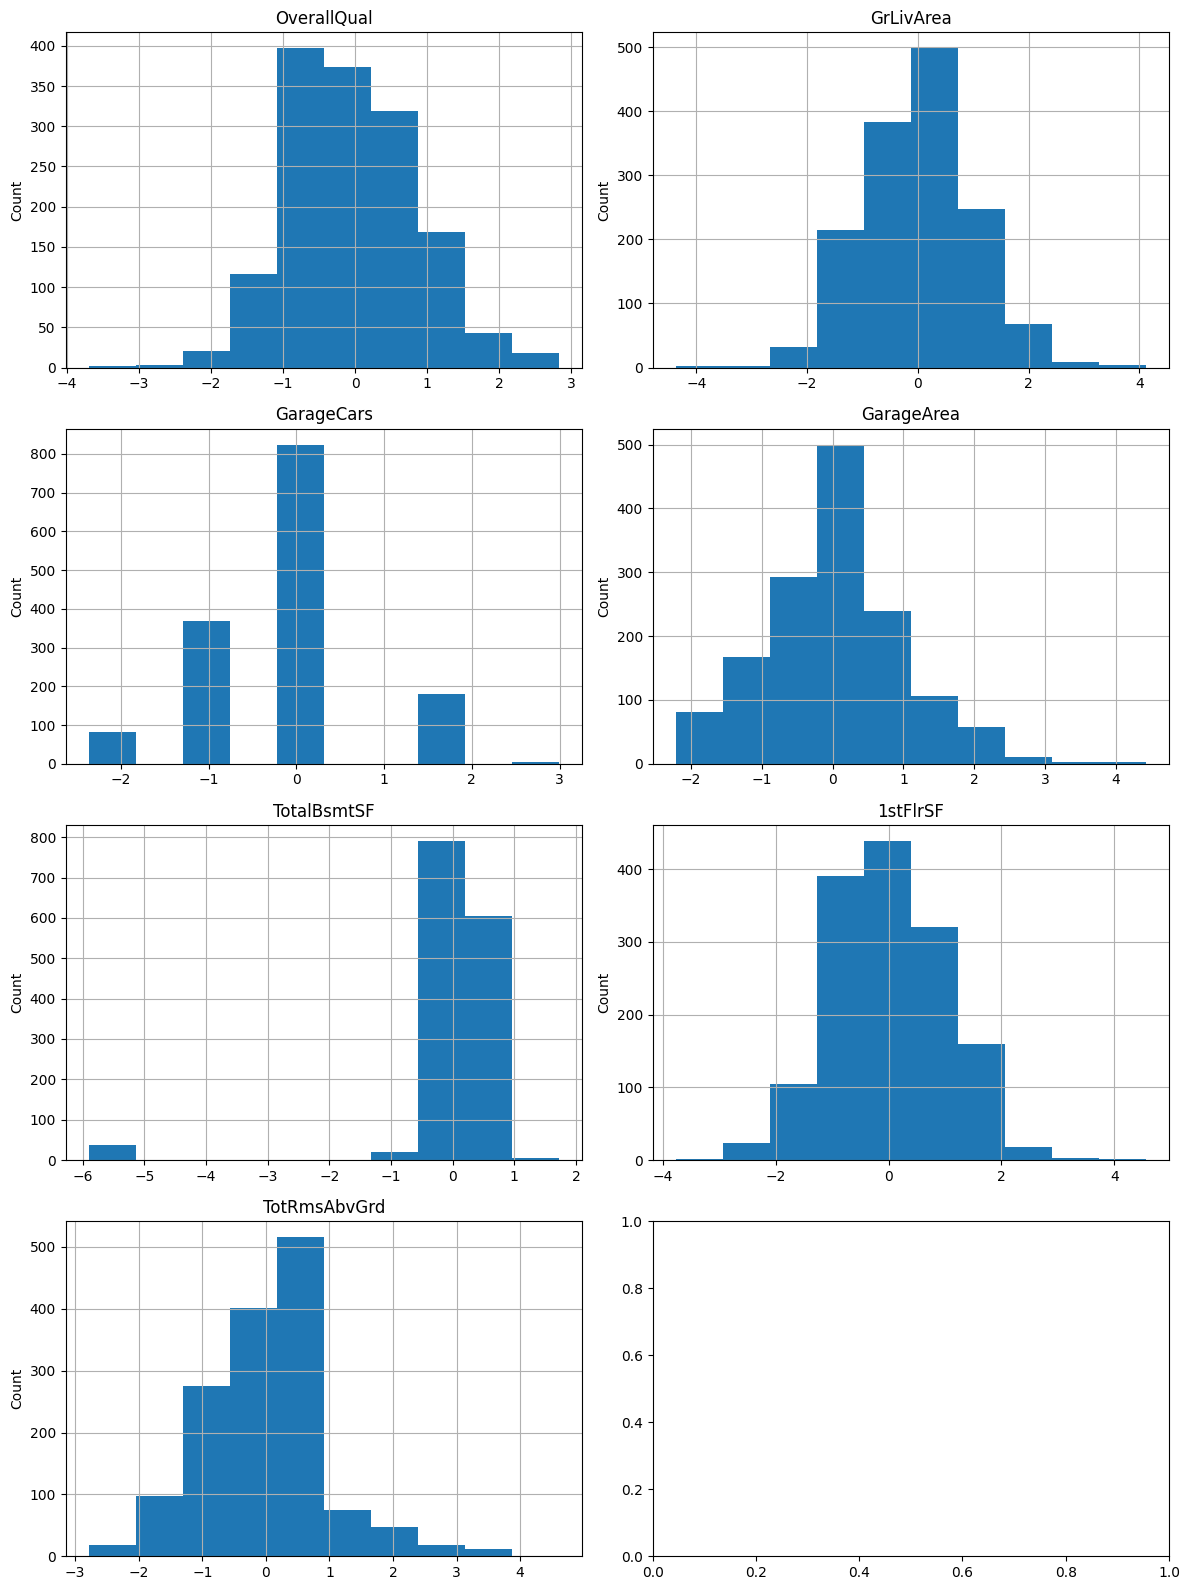

In [14]:


# Select the features for visualization
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd']

# Create a figure and axis
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
fig.subplots_adjust(hspace=0.5)

# Plot each feature
for i, feature in enumerate(selected_features):
    ax = axes[i // 2, i % 2]  # Calculate the row and column index for the subplot
    if feature == 'BsmtQual':
        data[feature].value_counts().plot(kind='bar', ax=ax)
    else:
        data[feature].hist(ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

# Show the chart
plt.tight_layout()
plt.show()


# 6. Machine learning, building baseline model

/Users/tichx/Downloads/184881767/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


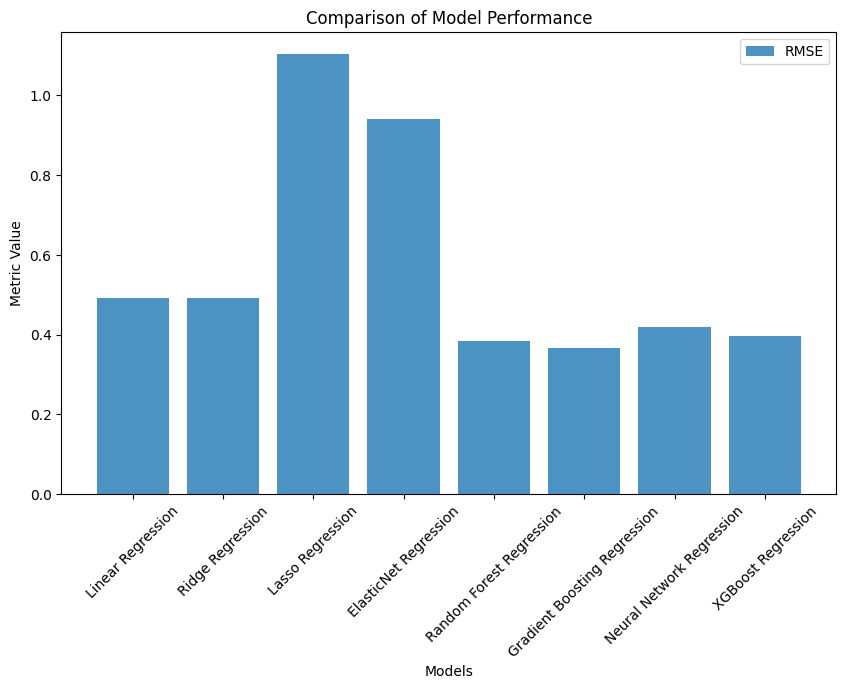

In [15]:
# Split the processed train data into features and target variable
X_train = processed_train_data.drop('SalePrice', axis=1)
y_train = processed_train_data['SalePrice']

X_test = processed_validation_data.drop('SalePrice', axis=1)
y_test = processed_validation_data['SalePrice']

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'Neural Network Regression': MLPRegressor(),
    'XGBoost Regression': XGBRegressor()
}

# Train and evaluate the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    results[name] = {'RMSE': rmse}

# Visualize the results
fig, ax = plt.subplots(figsize=(10, 6))
rmse_values = [result['RMSE'] for result in results.values()]

ax.bar(results.keys(), rmse_values, alpha=0.8, label='RMSE')

ax.set_xlabel('Models')
ax.set_ylabel('Metric Value')
ax.set_title('Comparison of Model Performance')
ax.legend()
plt.xticks(rotation=45)
plt.show()


In [16]:
# Print the evaluation results
for model, metrics in results.items():
    mse = metrics['RMSE']
    print(f"{model}: RMSE = {mse:.4f}")


Linear Regression: RMSE = 0.4910
Ridge Regression: RMSE = 0.4929
Lasso Regression: RMSE = 1.1033
ElasticNet Regression: RMSE = 0.9418
Random Forest Regression: RMSE = 0.3855
Gradient Boosting Regression: RMSE = 0.3678
Neural Network Regression: RMSE = 0.4201
XGBoost Regression: RMSE = 0.3979


# 7. Discussion

## Metrics selection
Our primary metric of evaluation for this regression task is the Root Mean Squared Error (RMSE), offering several advantages for our scenario:

RMSE quantifies prediction errors by computing the square root of the average squared discrepancies between predicted and observed house prices. By squaring the errors, RMSE penalizes larger mistakes more heavily, thereby prioritizing accuracy in our price predictions.

Compared to R-squared, RMSE provides a more direct measure of predictive capacity. While R-squared estimates the proportion of variance explained by the model within the training set, it doesn't necessarily reflect the model's predictive accuracy on unseen data, as highlighted in this article.

Thus, RMSE aligns with our goal of achieving accurate price predictions rather than solely explaining training data variance, offering an interpretable, straightforward measure of the model's prediction error.

## Model Evaluation
Among the evaluated models, the Gradient Boosting Regression model produced the smallest RMSE of 0.3695, closely followed by the Random Forest Regression model with an RMSE of 0.3845 and the XGBoost Regression model with an RMSE of 0.3979. These models performed the best in predicting house prices in our scenario, indicating that they managed to capture the underlying patterns and structures in the data most effectively.

Linear Regression and Ridge Regression performed reasonably well with RMSEs of 0.4910 and 0.4929, respectively. However, they weren't as proficient in managing the complexity of the dataset as their ensemble counterparts.

In contrast, the Lasso Regression model and the ElasticNet Regression model significantly underperformed with RMSE values of 1.1033 and 0.9418, respectively. This performance suggests that the imposed regularization penalties might have been too harsh, leading to underfitting.

## Next Steps and Potential Improvements

Our next steps should focus on tuning hyperparameters and exploring more complex models for the best-performing algorithms, namely Gradient Boosting, XGBoost, and Random Forest. Advanced techniques such as stacking could be explored to leverage the strength of multiple models.

It would also be beneficial to understand which features drive the predictions can provide valuable insights for future model development and refinement. Lastly, considering the time aspect of the data (i.e., temporal trends in house prices) could introduce another dimension of complexity and accuracy to the models.

# Second Check-in

Tuning the  Gradient Boosted Trees model (specifically the GradientBoostingRegressor in scikit-learn)

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosted Trees
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}

# Initialize Gradient Boosting Regressor
gbm = GradientBoostingRegressor()

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict on validation set and calculate RMSE
predictions = best_estimator.predict(X_test)
tuned_rmse = np.sqrt(mean_squared_error(y_test, predictions))

best_params, tuned_rmse


Fitting 5 folds for each of 108 candidates, totalling 540 fits


({'learning_rate': 0.05,
  'max_depth': 4,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.36518963166233176)

In [18]:
!pip install tensorflow keras

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers.legacy import Adam
import numpy as np

X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')
y_train = np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')

def create_model(neurons=10, dropout_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='linear'))  # Linear activation for regression
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

neurons_list = [16, 32, 64]
dropout_rate_list = [0.0, 0.1, 0.2]
learning_rate_list = [0.001, 0.01, 0.05, 0.1]
batch_size_list = [8, 16, 32]
epochs_list = [50, 100, 200]
best_rmse = float('inf')
best_params = None

for neurons in neurons_list:
    for dropout_rate in dropout_rate_list:
        for learning_rate in learning_rate_list:
            for batch_size in batch_size_list:
                for epochs in epochs_list:
                    # Create the model with current parameters
                    model = create_model(neurons=neurons, dropout_rate=dropout_rate, learning_rate=learning_rate)
                    # Train the model
                    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
                    # Predict on validation data
                    y_pred = model.predict(X_test)
                    mse = mean_squared_error(y_test, y_pred)
                    rmse = np.sqrt(mse)
                    
                    # Print live RMSE and parameters
                    print(f"Current RMSE: {rmse:.4f} with parameters: neurons={neurons}, dropout_rate={dropout_rate}, learning_rate={learning_rate}, batch_size={batch_size}, epochs={epochs}")
                    
                    if rmse < best_rmse:
                        best_rmse = rmse
                        best_params = {'neurons': neurons, 'dropout_rate': dropout_rate, 'learning_rate': learning_rate, 'batch_size': batch_size, 'epochs': epochs}

print("\nBest RMSE:", best_rmse)
print("Best parameters:", best_params)


10/10 [==============================] - 0s 337us/step
Current RMSE: 0.4135 with parameters: neurons=16, dropout_rate=0.0, learning_rate=0.001, batch_size=8, epochs=50
10/10 [==============================] - 0s 337us/step
Current RMSE: 0.4857 with parameters: neurons=16, dropout_rate=0.0, learning_rate=0.001, batch_size=8, epochs=100
10/10 [==============================] - 0s 356us/step
Current RMSE: 0.4768 with parameters: neurons=16, dropout_rate=0.0, learning_rate=0.001, batch_size=8, epochs=200
10/10 [==============================] - 0s 366us/step
Current RMSE: 0.4239 with parameters: neurons=16, dropout_rate=0.0, learning_rate=0.001, batch_size=16, epochs=50
10/10 [==============================] - 0s 396us/step
Current RMSE: 0.4340 with parameters: neurons=16, dropout_rate=0.0, learning_rate=0.001, batch_size=16, epochs=100
10/10 [==============================] - 0s 343us/step
Current RMSE: 0.4614 with parameters: neurons=16, dropout_rate=0.0, learning_rate=0.001, batch_size=

From the result above we can see the neural based model haven't been fine tuned to beat the GradientBoostingRegressor (RMSE 0.36 vs Nueral RMSE 0.39)